## Import Libraries

In [57]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
from scipy import stats
import category_encoders as ce

## Import Datasets

In [58]:
# Import Dataset
p1 = pd.read_csv("C:\\Users\\ALICOM4\\OneDrive\\Desktop\\Learnings\\Excel Data\\Salary_Data (Autosaved).csv")
p1

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,NaN,5.0,NaN
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,NaN,PhD,NaN,NaN,150000.0
3,36.0,NaN,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,8.0,200000.0
...,...,...,...,...,...,...
6698,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6699,32.0,Male,High School,Sales Associate,3.0,50000.0
6700,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6701,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


## Assesing Data (EDA)

In [59]:
p1.describe()

,Age,Years of Experience,Salary
count,6700.000000,6699.000000,6697.000000
mean,33.620597,8.090834,115296.421831
std,7.615514,6.054840,52811.311911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [60]:
p1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6703 entries, 0 to 6702
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6700 non-null   float64
 1   Gender               6700 non-null   object 
 2   Education Level      6700 non-null   object 
 3   Job Title            6700 non-null   object 
 4   Years of Experience  6699 non-null   float64
 5   Salary               6697 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.3+ KB


In [61]:
p1.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,NaN,5.0,NaN
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,NaN,PhD,NaN,NaN,150000.0
3,36.0,NaN,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,8.0,200000.0


In [62]:
p1.tail()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
6698,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6699,32.0,Male,High School,Sales Associate,3.0,50000.0
6700,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6701,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0
6702,26.0,Female,High School,Sales Executive,1.0,35000.0


In [63]:
p1.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [64]:
p1.nunique()

Age                     41
Gender                   3
Education Level          7
Job Title              193
Years of Experience     37
Salary                 446
dtype: int64

In [65]:
p1["Age"].unique()

array([32., 28., 45., 36., 52., 29., 42., nan, 26., 48., 35., 40., 27.,
       44., 33., 39., 25., 51., 34., 47., 30., 41., 37., 24., 43., 50.,
       31., 46., 49., 38., 23., 53., 61., 57., 62., 55., 56., 54., 60.,
       58., 22., 21.])

In [66]:
p1["Salary"].unique()

array([    nan,  65000., 150000.,  60000., 200000.,  55000., 120000.,
        80000.,  45000., 110000., 140000.,  40000.,  23000.,  90000.,
        35000., 190000.,  50000.,  30000., 250000.,  75000., 170000.,
       115000., 160000., 130000., 180000.,  85000.,  95000., 105000.,
        70000., 100000., 135000., 220000., 175000., 185000., 145000.,
       155000.,    350., 125000., 195000., 198000., 196000., 193000.,
        92000., 165000., 162000., 197000., 142000., 182000., 210000.,
          550., 122485., 169159., 187081., 166109.,  78354.,  90249.,
       132720., 161568., 127346., 120177.,  69032., 101332., 121450.,
       166375., 185119., 149217., 166512., 186963.,  75072., 163398.,
       103947., 179180., 175966., 190004., 152039.,  76742., 191790.,
       139398.,  95845., 160976., 126753., 161393., 139817., 181714.,
       114776., 105725.,  52731., 106492.,  73895., 119836.,  99747.,
       168287., 115920., 128078.,  51265., 165919., 188651.,  55538.,
       193964., 1047

In [67]:
p1["Years of Experience"].unique()

array([ 5. ,  3. ,  nan,  7. ,  8. , 12. ,  4. ,  1. , 10. , 18. ,  6. ,
       14. , 16. ,  0. ,  2. ,  9. , 13. , 11. , 15. , 25. , 20. , 21. ,
       22. , 19. , 17. , 23. , 24. ,  0.5,  1.5, 31. , 30. , 28. , 33. ,
       27. , 34. , 29. , 26. , 32. ])

<Axes: xlabel='Age', ylabel='Count'>

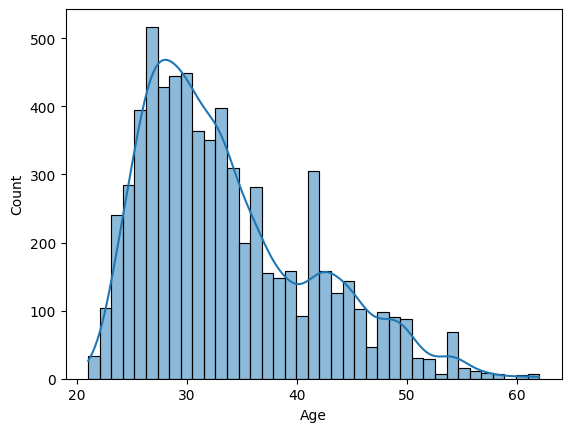

In [68]:
sns.histplot(p1, x=p1["Age"],kde=1)

In [69]:
stats.shapiro(p1["Age"])

C:\Users\ALICOM4\AppData\Local\Temp\ipykernel_1148\2978579660.py:1: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6703.
  stats.shapiro(p1["Age"])


ShapiroResult(statistic=nan, pvalue=1.0)

<Axes: ylabel='Age'>

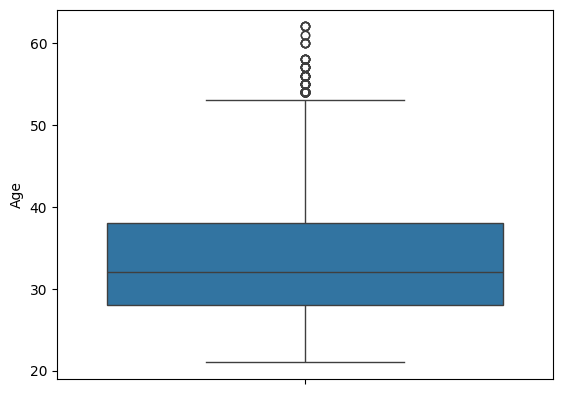

In [70]:
sns.boxplot(p1["Age"])

<Axes: xlabel='Years of Experience', ylabel='Count'>

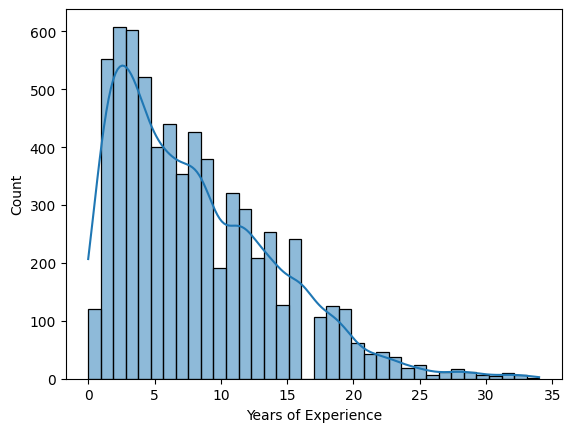

In [71]:
sns.histplot(p1, x=p1["Years of Experience"],kde=1)

In [72]:
stats.shapiro(p1["Years of Experience"])

C:\Users\ALICOM4\AppData\Local\Temp\ipykernel_1148\2429628067.py:1: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6703.
  stats.shapiro(p1["Years of Experience"])


ShapiroResult(statistic=nan, pvalue=1.0)

<Axes: ylabel='Years of Experience'>

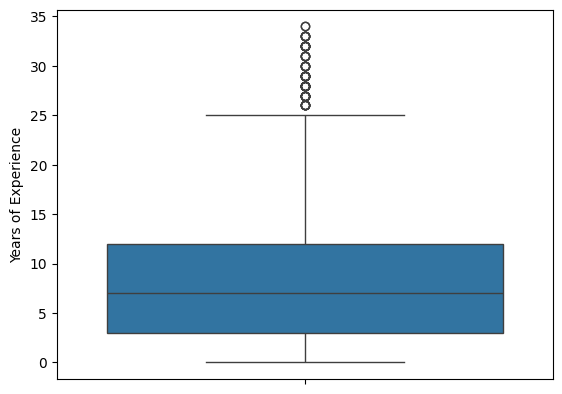

In [73]:
sns.boxplot(p1["Years of Experience"])

<Axes: xlabel='Salary', ylabel='Count'>

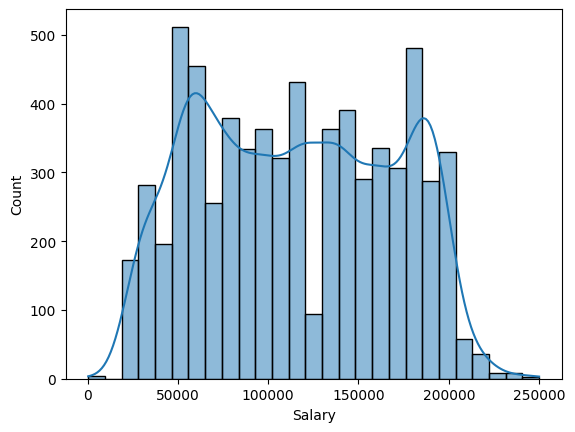

In [74]:
sns.histplot(p1, x=p1["Salary"],kde=1)

In [75]:
stats.shapiro(p1["Salary"])

C:\Users\ALICOM4\AppData\Local\Temp\ipykernel_1148\459931973.py:1: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6703.
  stats.shapiro(p1["Salary"])


ShapiroResult(statistic=nan, pvalue=1.0)

<Axes: ylabel='Salary'>

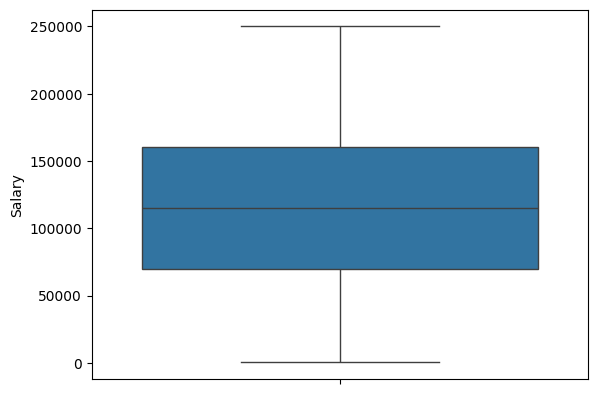

In [76]:
sns.boxplot(p1["Salary"])

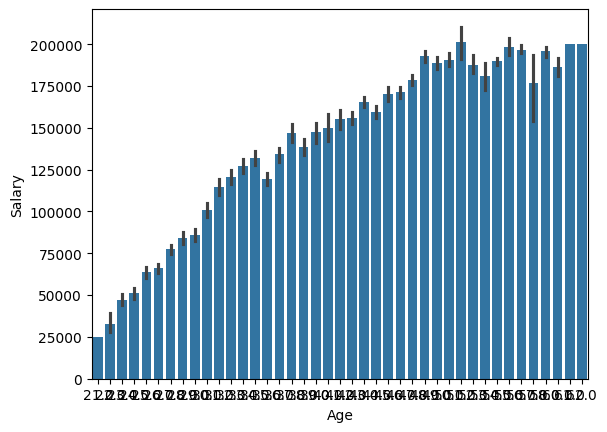

In [77]:
sns.barplot(data=p1, x="Age", y="Salary")
plt.show()

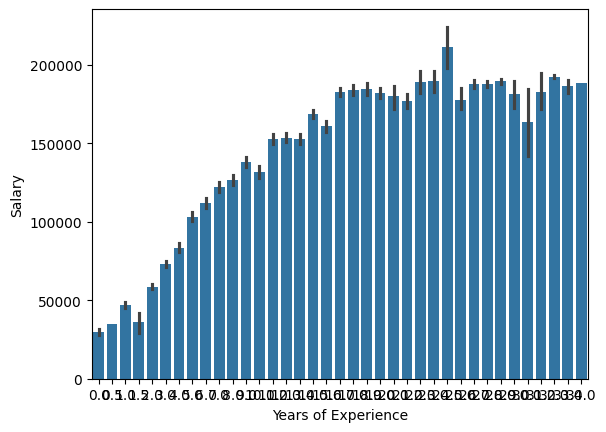

In [78]:
sns.barplot(data=p1, x="Years of Experience", y="Salary")
plt.show()

## Cleaning Data

In [79]:
p1.isnull().sum() / len(p1) * 100

Age                    0.044756
Gender                 0.044756
Education Level        0.044756
Job Title              0.044756
Years of Experience    0.059675
Salary                 0.089512
dtype: float64

In [80]:
# Imputation
p1["Age"] = p1["Age"].fillna(value=p1['Age'].mean())
p1["Gender"] = p1["Gender"].fillna(value=p1['Gender'].mode()[0])
p1["Education Level"] = p1["Education Level"].fillna(value=p1['Education Level'].mode()[0])
p1["Years of Experience"] = p1["Years of Experience"].fillna(value=p1['Years of Experience'].mean())
p1["Job Title"] = p1["Job Title"].fillna(value=p1['Job Title'].mode()[0])
p1["Salary"] = p1["Salary"].fillna(value=p1['Salary'].mean())


In [81]:
p1.isnull().sum() / len(p1) * 100

Age                    0.0
Gender                 0.0
Education Level        0.0
Job Title              0.0
Years of Experience    0.0
Salary                 0.0
dtype: float64

<Axes: ylabel='Age'>

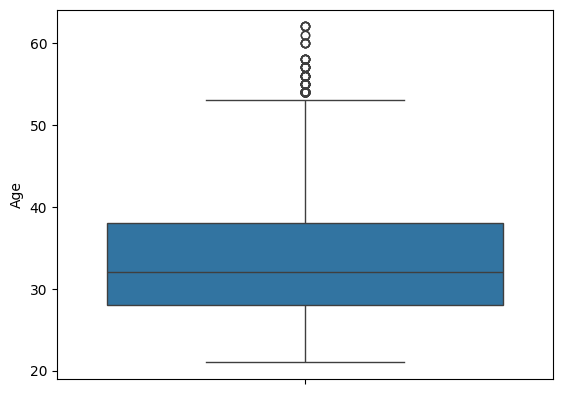

In [82]:
# Ouliers removal
sns.boxplot(p1["Age"])

In [83]:
Q1 = p1["Age"].quantile(0.25) 
Q3 = p1["Age"].quantile(0.75) 
IQR = Q3 - Q1
IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
p1= p1[(p1["Age"] > lower_bound) & (p1["Age"] < upper_bound)] ## Means that the data which have to be taken is is between max and min line

<Axes: ylabel='Age'>

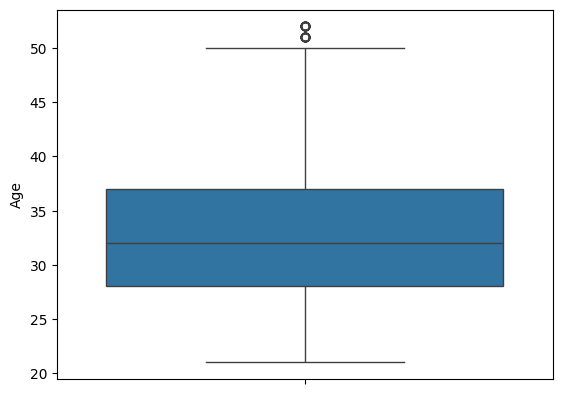

In [84]:
sns.boxplot(p1["Age"])

<Axes: ylabel='Years of Experience'>

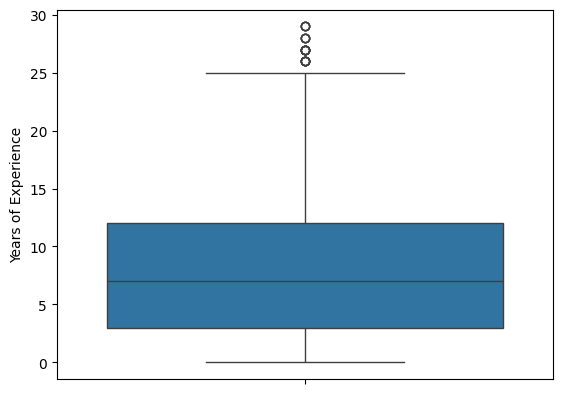

In [85]:
sns.boxplot(p1["Years of Experience"])

In [86]:
Q1 = p1["Years of Experience"].quantile(0.25) 
Q3 = p1["Years of Experience"].quantile(0.75) 
IQR = Q3 - Q1
IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
p1= p1[(p1["Years of Experience"] > lower_bound) & (p1["Years of Experience"] < upper_bound)] ## Means that the data which have to be taken is is between max and min line

<Axes: ylabel='Salary'>

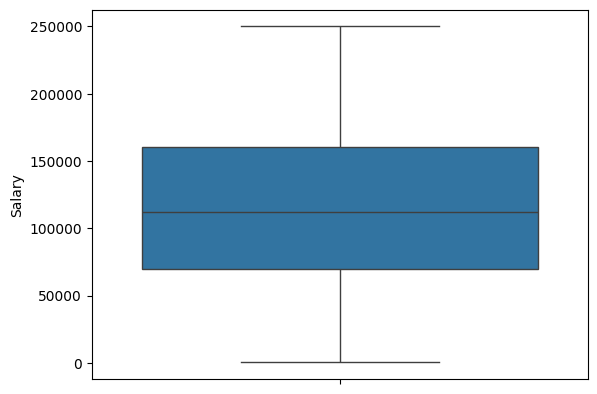

In [87]:
sns.boxplot(p1["Salary"])

<Axes: xlabel='Age', ylabel='Count'>

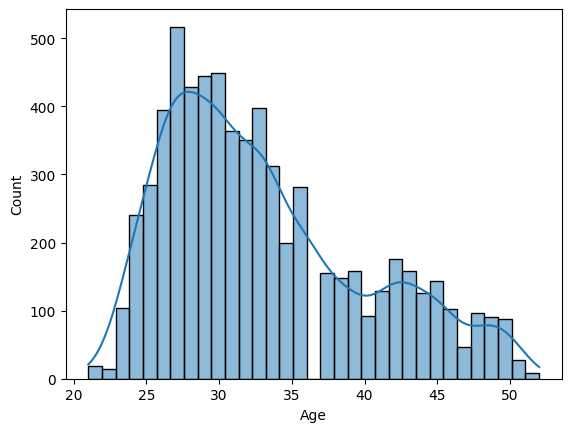

In [88]:
sns.histplot(p1["Age"],kde=1)

<Axes: xlabel='Salary', ylabel='Count'>

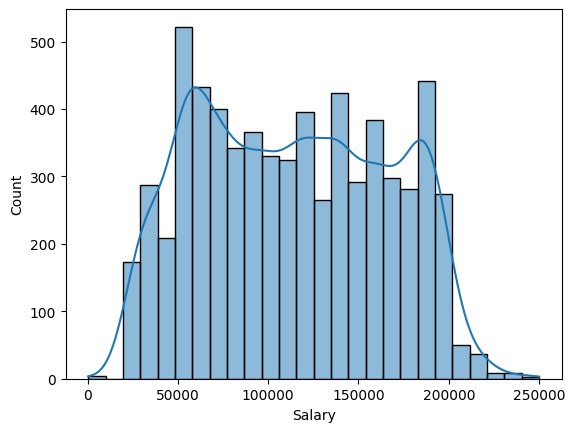

In [89]:
sns.histplot(p1["Salary"],kde=1)

<Axes: xlabel='Years of Experience', ylabel='Count'>

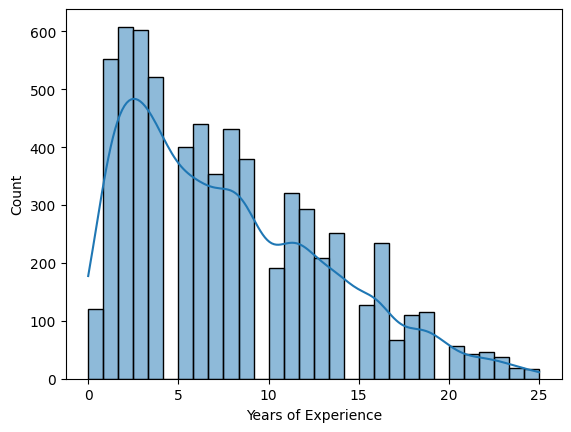

In [90]:
sns.histplot(p1["Years of Experience"],kde=1)

In [91]:
p1.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [92]:
p1_duplicates = p1[p1.duplicated()]
p1_duplicates.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
195,28.0,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
250,30.0,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0
251,38.0,Male,Master's,Senior IT Consultant,9.0,110000.0
252,45.0,Female,PhD,Senior Product Designer,15.0,150000.0
253,28.0,Male,Bachelor's,Junior Business Development Associate,2.0,40000.0


In [93]:
p1_duplicates.shape

(4823, 6)

In [94]:
# Duplicates would not be removed because majority duplicates are real values.

In [95]:
p1.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.000000,115296.421831
1,28.0,Female,Master's,Data Analyst,3.000000,65000.000000
2,45.0,Male,PhD,Software Engineer,8.090834,150000.000000
3,36.0,Male,Bachelor's,Sales Associate,7.000000,60000.000000
4,52.0,Male,Master's,Director,8.000000,200000.000000


In [97]:
p1["Education Level"].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

In [98]:
import pandas as pd

# Sample DataFrame 'p1'
df = pd.DataFrame({'Education Level': ["Bachelor's", "Master's", "PhD", "High School"]})

# Modify values in 'Education Level' column for 'p1'
def standardize_education_level(edu_level):
    if edu_level.lower() in ["bachelor's", "bachelor's degree"]:
        return "Bachelor's"
    elif edu_level.lower() in ["master's", "master's degree"]:
        return "Master's"
    elif edu_level.lower() == "phd":
        return "PhD"
    else:
        return edu_level  # Return the original value if it doesn't match any of the specified categories

p1['Education Level'] = p1['Education Level'].apply(standardize_education_level)

print("Updated p1 DataFrame:")
print(p1)



Updated p1 DataFrame:
       Age Gender Education Level              Job Title  Years of Experience  \
0     32.0      0      Bachelor's      Software Engineer             5.000000   
1     28.0      1        Master's           Data Analyst             3.000000   
2     45.0      0             PhD      Software Engineer             8.090834   
3     36.0      0      Bachelor's        Sales Associate             7.000000   
4     52.0      0        Master's               Director             8.000000   
...    ...    ...             ...                    ...                  ...   
6698  49.0      1             PhD  Director of Marketing            20.000000   
6699  32.0      0     High School        Sales Associate             3.000000   
6700  30.0      1      Bachelor's      Financial Manager             4.000000   
6701  46.0      0        Master's      Marketing Manager            14.000000   
6702  26.0      1     High School        Sales Executive             1.000000   

     

In [99]:
p1["Education Level"].unique()

array(["Bachelor's", "Master's", 'PhD', 'High School'], dtype=object)

In [100]:
p1.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,0,Bachelor's,Software Engineer,5.000000,115296.421831
1,28.0,1,Master's,Data Analyst,3.000000,65000.000000
2,45.0,0,PhD,Software Engineer,8.090834,150000.000000
3,36.0,0,Bachelor's,Sales Associate,7.000000,60000.000000
4,52.0,0,Master's,Director,8.000000,200000.000000


In [101]:
"""import pandas as pd

# Sample DataFrame 'p1' with the 'Gender' column
df= pd.DataFrame({'Gender': ['Male', 'Female', 'Male', 'Female', 'Other' ]})

# Replace 'Male' with 0 and 'Female' with 1 in the 'Gender' column of 'p1'
p1['Gender'] = p1['Gender'].replace({'Male': 0, 'Female': 1,'Other': 2})

# Print the updated DataFrame to check
print(p1)"""


"import pandas as pd\n\n# Sample DataFrame 'p1' with the 'Gender' column\ndf= pd.DataFrame({'Gender': ['Male', 'Female', 'Male', 'Female', 'Other' ]})\n\n# Replace 'Male' with 0 and 'Female' with 1 in the 'Gender' column of 'p1'\np1['Gender'] = p1['Gender'].replace({'Male': 0, 'Female': 1,'Other': 2})\n\n# Print the updated DataFrame to check\nprint(p1)"

In [102]:
"""import pandas as pd

# Sample DataFrame 'p1' with the 'Educational Level' column
df = pd.DataFrame({'Education Level': ["Bachelor's", "Master's", "PhD", 'High School']})

# Replace educational levels with numerical values in the 'Educational Level' column of 'p1'
p1['Education Level'] = p1['Education Level'].replace({"Bachelor's": 0, "Master's": 1, "PhD": 2, 'High School': 3})

# Print the updated DataFrame to check
print(p1)"""


'import pandas as pd\n\n# Sample DataFrame \'p1\' with the \'Educational Level\' column\ndf = pd.DataFrame({\'Education Level\': ["Bachelor\'s", "Master\'s", "PhD", \'High School\']})\n\n# Replace educational levels with numerical values in the \'Educational Level\' column of \'p1\'\np1[\'Education Level\'] = p1[\'Education Level\'].replace({"Bachelor\'s": 0, "Master\'s": 1, "PhD": 2, \'High School\': 3})\n\n# Print the updated DataFrame to check\nprint(p1)'

In [103]:
p1.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,0,Bachelor's,Software Engineer,5.000000,115296.421831
1,28.0,1,Master's,Data Analyst,3.000000,65000.000000
2,45.0,0,PhD,Software Engineer,8.090834,150000.000000
3,36.0,0,Bachelor's,Sales Associate,7.000000,60000.000000
4,52.0,0,Master's,Director,8.000000,200000.000000


## Statistcal Analysis

\\ Null Hypothesis: Data is Normal

\\ Alternate Hypothesis: Data is not Normal

p-value: 4.1868617801949963e-47. Sample does not look Gaussian/Normally distributed (Reject H0)
p-value: 1.652518707257972e-47. Sample does not look Gaussian/Normally distributed (Reject H0)
p-value: 2.1258402862758558e-38. Sample does not look Gaussian/Normally distributed (Reject H0)


C:\Users\ALICOM4\AppData\Local\Temp\ipykernel_1148\353922201.py:6: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6550.
  statistic, p = stats.shapiro(p1["Age"])
C:\Users\ALICOM4\AppData\Local\Temp\ipykernel_1148\353922201.py:15: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6550.
  statistic, p = stats.shapiro(p1["Years of Experience"])
C:\Users\ALICOM4\AppData\Local\Temp\ipykernel_1148\353922201.py:24: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6550.
  statistic, p = stats.shapiro(p1["Salary"])


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,0,Bachelor's,Software Engineer,5.000000,115296.421831
1,28.0,1,Master's,Data Analyst,3.000000,65000.000000
2,45.0,0,PhD,Software Engineer,8.090834,150000.000000
3,36.0,0,Bachelor's,Sales Associate,7.000000,60000.000000
4,52.0,0,Master's,Director,8.000000,200000.000000


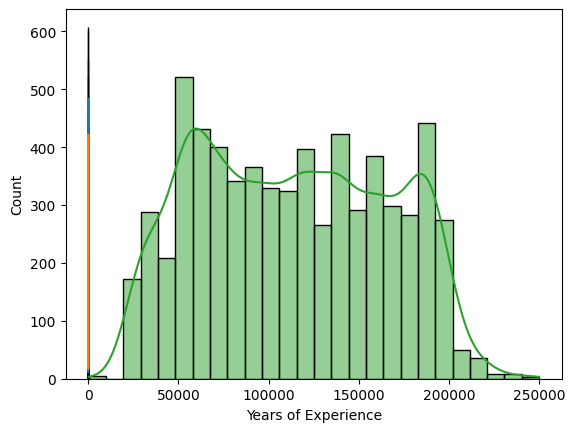

In [104]:
sns.histplot(p1["Years of Experience"], kde=1)
sns.histplot(p1["Age"], kde=1)
sns.histplot(p1["Salary"], kde=1)

# Perform Shapiro-Wilk test for normality
statistic, p = stats.shapiro(p1["Age"])

# Print the results
if p > 0.05:
    print(f'p-value: {p}. Sample looks Gaussian/Normally distributed (Could not Reject H0)')
else:
    print(f'p-value: {p}. Sample does not look Gaussian/Normally distributed (Reject H0)')

# Perform Shapiro-Wilk test for normality
statistic, p = stats.shapiro(p1["Years of Experience"])

# Print the results
if p > 0.05:
    print(f'p-value: {p}. Sample looks Gaussian/Normally distributed (Could not Reject H0)')
else:
    print(f'p-value: {p}. Sample does not look Gaussian/Normally distributed (Reject H0)')

# Perform Shapiro-Wilk test for normality
statistic, p = stats.shapiro(p1["Salary"])

# Print the results
if p > 0.05:
    print(f'p-value: {p}. Sample looks Gaussian/Normally distributed (Could not Reject H0)')
else:
    print(f'p-value: {p}. Sample does not look Gaussian/Normally distributed (Reject H0)')
p1.head()

# Transforming Data

In [105]:
p1.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,0,Bachelor's,Software Engineer,5.000000,115296.421831
1,28.0,1,Master's,Data Analyst,3.000000,65000.000000
2,45.0,0,PhD,Software Engineer,8.090834,150000.000000
3,36.0,0,Bachelor's,Sales Associate,7.000000,60000.000000
4,52.0,0,Master's,Director,8.000000,200000.000000


C:\Users\ALICOM4\AppData\Local\Temp\ipykernel_1148\1171457256.py:8: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6550.
  print(stats.shapiro(p1["Age"]))
C:\Users\ALICOM4\AppData\Local\Temp\ipykernel_1148\1171457256.py:9: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6550.
  print(stats.shapiro(p1["Years of Experience"]))
C:\Users\ALICOM4\AppData\Local\Temp\ipykernel_1148\1171457256.py:10: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6550.
  print(stats.shapiro(p1["Salary"]))


ShapiroResult(statistic=0.9336574930575294, pvalue=4.1868617801949963e-47)
ShapiroResult(statistic=0.9320262749118533, pvalue=1.652518707257972e-47)
ShapiroResult(statistic=0.9618297925354939, pvalue=2.1258402862758558e-38)


<Axes: xlabel='Age', ylabel='Count'>

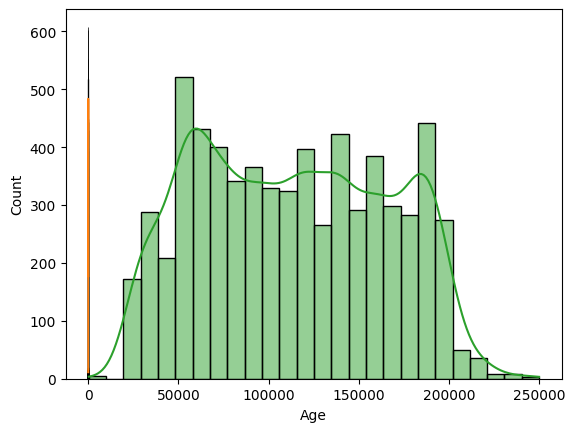

In [106]:
#LOG TRANSFORM
#p1["Age"] = np.log(p1["Age"])
#p1["Years of Experience"] = np.log(p1["Years of Experience"])
#p1["Salary"] = np.log(p1["Salary"])


#p1.head()
print(stats.shapiro(p1["Age"]))
print(stats.shapiro(p1["Years of Experience"]))
print(stats.shapiro(p1["Salary"]))

sns.histplot(p1["Age"], kde=1)
sns.histplot(p1["Years of Experience"], kde=1)
sns.histplot(p1["Salary"], kde=1)

## Levene Test

\\ Null Hypothesis: Data is Homoginous

\\ Alternate Hypothesis: Data is not Homoginous

In [107]:
import scipy.stats as stats
import pandas as pd

# Assuming you have already loaded your data into the p1 DataFrame

# Extract 'Age' and 'Fare' columns from the p1 DataFrame
age_column = p1['Age']
experience_column = p1['Years of Experience']
salary_column = p1['Salary']



# Perform Levene Test
w_stat, p_val = stats.levene(age_column, experience_column, salary_column)

print("w_statistic:", w_stat)
print("p-value:", p_val)

if p_val < 0.05:  # Assuming alpha level of 0.05
    print(f"Variances are equal: Fail to Reject the null hypothesis")
else:
    print(f"Variances are not equal: Reject the null hypothesis")

w_statistic: 19257.661888976567
p-value: 0.0
Variances are equal: Fail to Reject the null hypothesis


## Chi-Squared Test

In [108]:
contigency_table = pd.crosstab(p1["Gender"], p1["Education Level"])
contigency_table

Education Level,Bachelor's,High School,Master's,PhD
Gender,,,,
0,1815,185,774,789
1,1198,251,1063,467
Other,0,6,2,0


In [109]:
chi2, p, dof, expected = stats.chi2_contingency(contigency_table)

# Print
print("Chi_Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected:", expected)

Chi_Square Statistic: 274.2614828051794
p-value: 2.657352456451273e-56
Degrees of Freedom: 6
Expected: [[1.63898000e+03 2.40434504e+02 1.00035985e+03 6.83225649e+02]
 [1.37034000e+03 2.01025649e+02 8.36394046e+02 5.71240305e+02]
 [3.68000000e+00 5.39847328e-01 2.24610687e+00 1.53404580e+00]]


## Wilcoxon(Paired Sampling)

In [110]:

from scipy.stats import wilcoxon

# Extract the columns from the p1 DataFrame
age_column = p1['Age']
experience_column = p1['Years of Experience']
salary_column = p1['Salary']

# Perform Wilcoxon signed-rank test between 'Age' and 'Years of Experience'
statistic_1, p_val_1 = wilcoxon(age_column, experience_column)
print("Test statistic between Age and Years of Experience:", statistic_1)
print("p-value between Age and Years of Experience:", p_val_1)

# Perform Wilcoxon signed-rank test between 'Age' and 'Salary'
statistic_2, p_val_2 = wilcoxon(age_column, salary_column)
print("\nTest statistic between Age and Salary:", statistic_2)
print("p-value between Age and Salary:", p_val_2)

# Perform Wilcoxon signed-rank test between 'Years of Experience' and 'Salary'
statistic_3, p_val_3 = wilcoxon(experience_column, salary_column)
print("\nTest statistic between Years of Experience and Salary:", statistic_3)
print("p-value between Years of Experience and Salary:", p_val_3)

alpha = 0.05  # Significance level

if any(p_val < alpha for p_val in [p_val_1, p_val_2, p_val_3]):
    print("\nThere is a significant difference between at least one pair of the Age, Years of Experience, and Salary columns.")
else:
    print("\nThere is no significant difference between any pair of the Age, Years of Experience, and Salary columns.")


Test statistic between Age and Years of Experience: 0.0
p-value between Age and Years of Experience: 0.0

Test statistic between Age and Salary: 0.0
p-value between Age and Salary: 0.0

Test statistic between Years of Experience and Salary: 0.0
p-value between Years of Experience and Salary: 0.0

There is a significant difference between at least one pair of the Age, Years of Experience, and Salary columns.


## Spearman's Correlation Coefficient

In [111]:
def pearson(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    x_std = np.std(x)
    y_std = np.std(y)
    n = len(x)
    return sum((x-x_mean)*(y-y_mean))/(n*x_std*y_std)

def spearman(x,y):
    x_rank = pd.Series(x).rank()
    y_rank = pd.Series(y).rank()
    return pearson(x_rank,y_rank)

# Example Dataset
x=(p1["Age"])
y=(p1["Years of Experience"])

print(f"Spearman Correlation Coefficient: {spearman(x,y)}")
# Differentiate all values
if spearman(x,y) < 0.6 > 0:
    print("Positive Relation")
elif spearman(x,y) > 0.6:
    print("Highly Positive Relation")
elif spearman(x,y) > -0.6 < 0:
    print("Negative Correlation")
elif  spearman(x,y) < -0.6:
    print("Highly Negative Correlation")
else:
    print("No Relation")

Spearman Correlation Coefficient: 0.941199227668826
Highly Positive Relation


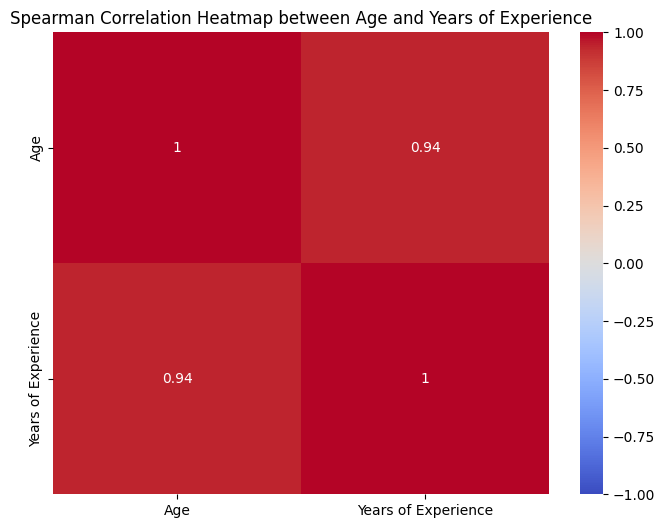

In [112]:
data =pd.DataFrame({'Age': x, 'Years of Experience': y})
heatmap_data = data.corr(method='spearman')

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman Correlation Heatmap between Age and Years of Experience')
plt.show()

In [113]:
def pearson(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    x_std = np.std(x)
    y_std = np.std(y)
    n = len(x)
    return sum((x-x_mean)*(y-y_mean))/(n*x_std*y_std)

def spearman(x,y):
    x_rank = pd.Series(x).rank()
    y_rank = pd.Series(y).rank()
    return pearson(x_rank,y_rank)

# Example Dataset
x=(p1["Age"])
y=(p1["Salary"])

print(f"Spearman Correlation Coefficient: {spearman(x,y)}")
# Differentiate all values
if spearman(x,y) < 0.6 > 0:
    print("Positive Relation")
elif spearman(x,y) > 0.6:
    print("Highly Positive Relation")
elif spearman(x,y) > -0.6 < 0:
    print("Negative Correlation")
elif  spearman(x,y) < -0.6:
    print("Highly Negative Correlation")
else:
    print("No Relation")

Spearman Correlation Coefficient: 0.7311259558132425
Highly Positive Relation


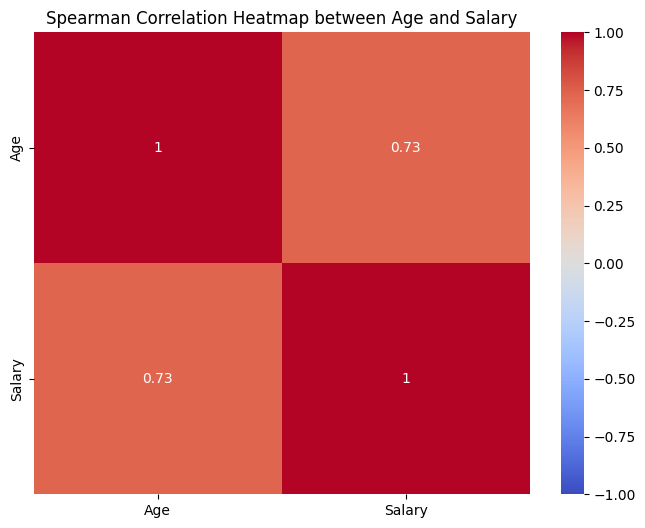

In [114]:
data =pd.DataFrame({'Age': x, 'Salary': y})
heatmap_data = data.corr(method='spearman')

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman Correlation Heatmap between Age and Salary')
plt.show()

In [115]:
def pearson(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    x_std = np.std(x)
    y_std = np.std(y)
    n = len(x)
    return sum((x-x_mean)*(y-y_mean))/(n*x_std*y_std)

def spearman(x,y):
    x_rank = pd.Series(x).rank()
    y_rank = pd.Series(y).rank()
    return pearson(x_rank,y_rank)

# Example Dataset
x=(p1["Years of Experience"])
y=(p1["Salary"])

print(f"Spearman Correlation Coefficient: {spearman(x,y)}")
# Differentiate all values
if spearman(x,y) < 0.6 > 0:
    print("Positive Relation")
elif spearman(x,y) > 0.6:
    print("Highly Positive Relation")
elif spearman(x,y) > -0.6 < 0:
    print("Negative Correlation")
elif  spearman(x,y) < -0.6:
    print("Highly Negative Correlation")
else:
    print("No Relation")

Spearman Correlation Coefficient: 0.8512746456749831
Highly Positive Relation


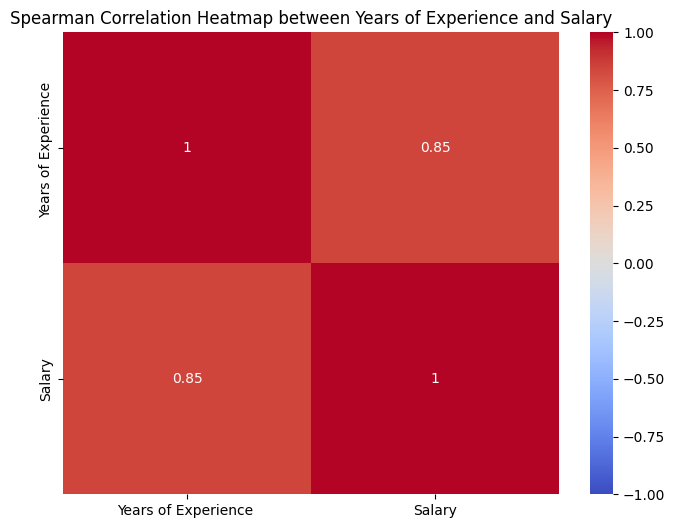

In [116]:
data =pd.DataFrame({'Years of Experience ': x, 'Salary': y})
heatmap_data = data.corr(method='spearman')

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman Correlation Heatmap between Years of Experience and Salary')
plt.show()

# Organize Data

In [117]:
p1.columns
# there's no need to change Column name or make any new

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

## Swarmplot 

c:\Users\ALICOM4\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 79.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ALICOM4\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 75.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Gender', ylabel='Age'>

c:\Users\ALICOM4\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 84.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ALICOM4\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 81.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


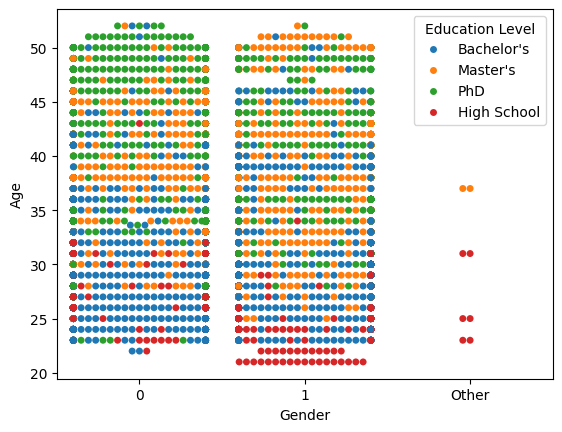

In [118]:
sns.swarmplot(data=p1, x="Gender", y="Age",hue="Education Level")

c:\Users\ALICOM4\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 74.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ALICOM4\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 70.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Gender', ylabel='Salary'>

c:\Users\ALICOM4\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 80.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ALICOM4\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 77.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ALICOM4\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 80.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


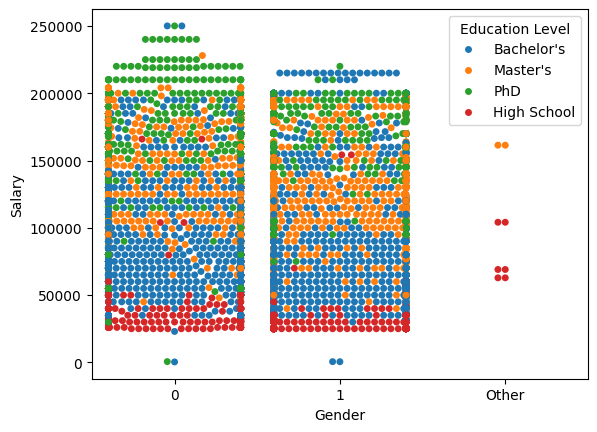

In [119]:
sns.swarmplot(data=p1, x="Gender", y="Salary",hue="Education Level")

c:\Users\ALICOM4\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 82.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ALICOM4\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 80.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Gender', ylabel='Years of Experience'>

c:\Users\ALICOM4\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 86.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ALICOM4\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 84.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


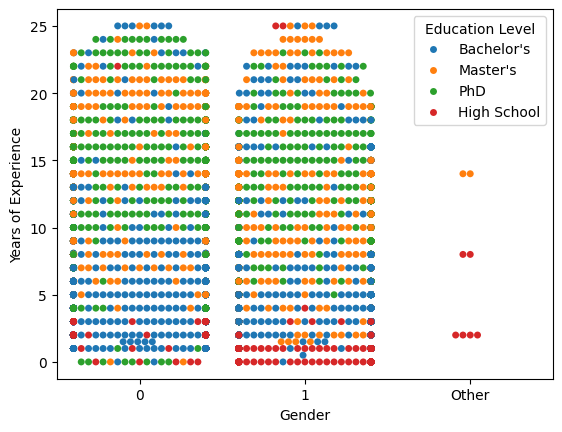

In [120]:
sns.swarmplot(data=p1, x="Gender", y="Years of Experience",hue="Education Level")

In [121]:
table = pd.pivot_table(p1, values="Years of Experience", index="Job Title", columns = "Education Level", aggfunc=np.sum )
table

C:\Users\ALICOM4\AppData\Local\Temp\ipykernel_1148\3111328764.py:1: FutureWarning: The provided callable <function sum at 0x000001FAEFAFC220> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table = pd.pivot_table(p1, values="Years of Experience", index="Job Title", columns = "Education Level", aggfunc=np.sum )


Education Level,Bachelor's,High School,Master's,PhD
Job Title,,,,
Account Manager,5.0,NaN,NaN,NaN
Accountant,20.0,NaN,NaN,NaN
Administrative Assistant,18.0,NaN,NaN,NaN
Back end Developer,954.0,54.0,472.0,NaN
Business Analyst,7.0,NaN,5.0,NaN
...,...,...,...,...
UX Designer,NaN,NaN,5.0,NaN
UX Researcher,NaN,NaN,2.0,NaN
VP of Finance,NaN,NaN,19.0,NaN


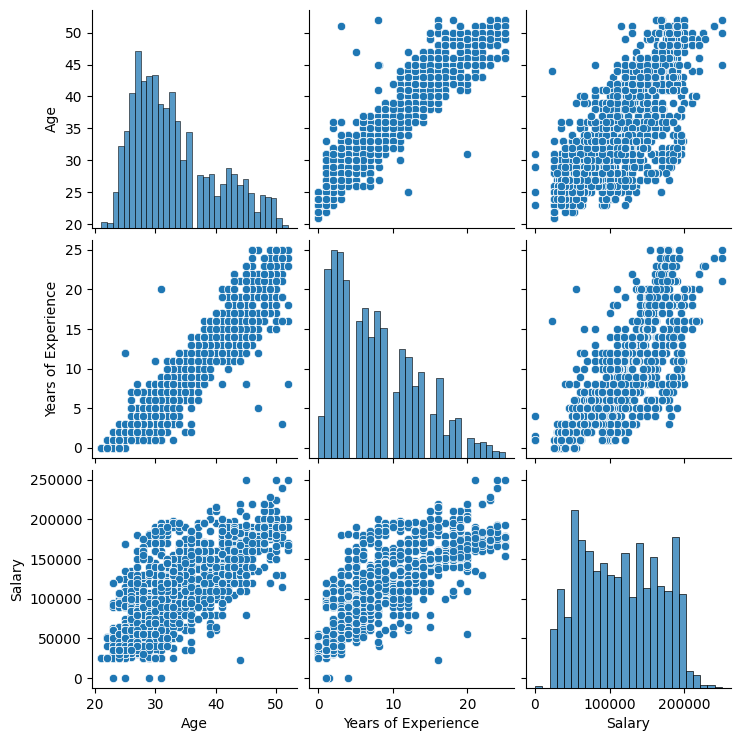

In [122]:
sns.pairplot(p1)

In [123]:
p1.to_csv("Wrangled Data of Salary_Dataset.csv") 